### Supplementary Notebook S1A
---
### Single-cell transcriptomics of 20 mouse organs creates a *Tabula Muris* [(The Tabula Muris Consortium., Overall coordination., Schaum, N. et al., 2020)](https://doi.org/10.1101/665307)

The processed result of this datasest is shown in **Supplementary Figure 1A** of the manuscript.

**Public**: [Single-cell transcriptomics of 20 mouse organs creates a *Tabula Muris*](https://www.nature.com/articles/s41586-018-0590-4) 

**Raw Data**: [link](http://tabula-muris.ds.czbiohub.org/) 

In [14]:
import anndata as a
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [5]:
adata = a.read_h5ad('/data/pinello/PEOPLE/michael/tabula-muris.h5ad')
adata

AnnData object with n_obs × n_vars = 45423 × 6301
    obs: 'cell_ontology_class', 'clusters_from_manuscript', 'free_annotation', 'mouse_sex', 'mouse_id', 'plate_barcode', 'tissue', 'subtissue', 'n_genes', 'n_counts', 'clusters_louvain', 'clusters_leiden'
    var: 'means', 'dispersions', 'dispersions_norm'
    uns: 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'tissue_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [16]:
sc.pp.highly_variable_genes(adata)

In [34]:
genes = adata.var.loc[adata.var['highly_variable'] == True].sort_values('dispersions_norm', ascending=False)[0:100].reset_index()['index']
genes.to_csv('tabula_muris-genes.txt',sep='\n', index=False, header=False)
genes

0             S100b
1             Kif5c
2        ERCC-00019
3              Hhip
4             Gdf15
          ...      
95          Ppp2r2c
96             Nox4
97            Aadac
98    1500015O10Rik
99          Ccdc141
Name: index, Length: 100, dtype: object

In [38]:
adata

AnnData object with n_obs × n_vars = 45423 × 6301
    obs: 'cell_ontology_class', 'clusters_from_manuscript', 'free_annotation', 'mouse_sex', 'mouse_id', 'plate_barcode', 'tissue', 'subtissue', 'n_genes', 'n_counts', 'clusters_louvain', 'clusters_leiden'
    var: 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'tissue_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [57]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.umap(adata, n_components=3)

In [58]:
adata.obsm['X_umap']

(45423, 3)

In [64]:
adata.var_names

Index(['0610007P08Rik', '0610007P22Rik', '0610009L18Rik', '0610010F05Rik',
       '0610010O12Rik', '0610040J01Rik', '100043387', '1100001G20Rik',
       '1110002N22Rik', '1110008J03Rik',
       ...
       'Znrf2', 'Zrsr1', 'Zscan21', 'Zscan22', 'Zscan29', 'Zswim1', 'Zswim6',
       'Zswim7', 'Zw10', 'Zxdc'],
      dtype='object', name='index', length=6301)

In [60]:
results_file = './tabula_muris-scvr_prep.h5ad'
adata.write(results_file)

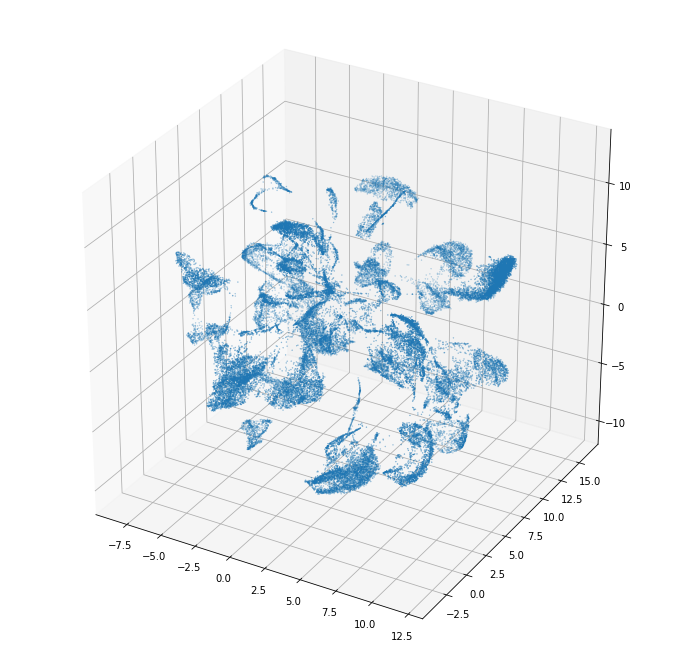

In [131]:
x,y,z = adata.obsm['X_umap'][:,0], adata.obsm['X_umap'][:,1], adata.obsm['X_umap'][:,2]

x = np.array(x)
y = np.array(y)
z = np.array(z)

fig = plt.figure(figsize=(12,12), facecolor='w')
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, s=0.1)

In [97]:
pd.DataFrame(x).to_csv('3dplot.txt',sep='\n', index=False, header=False)

Depending on the desired annotations and genes to be visualized by the user, the following command can be executed to create *singlecellVR*-compatible .JSON object. 

`scvr -f ./tabula_muris-scvr_prep.h5ad -t scanpy -a ANNOTATIONS [-g GENES] [-o OUTPUT]`